Name: Dhruv Patel

Assignment: Project #3: Sentiment Analysis of Reviews

Date: Dec 3rd, 2024

Step 1: 
- Importing all of the necessary and required Libraries

In [38]:
import requests
import pandas as pd
from textblob import TextBlob
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')


[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

Step 2:
- Setting up yelp fusion API key

In [39]:
# Load API key from yelpkeys.py file
api_key = "u6Ye4FZ1F9HJc-Sxh96cFZ6nMxoNoPusd-vtDs3Me7IXnA8u9IAlEjDHLv47yhKr8OW4T623CIgPPO8vC0gX0Jf4ihkyvikL7_fP9jaY8stETG4jyFBgnvuiYQw-Z3Yx"
headers = {"Authorization": f"Bearer {api_key}"}


Step 3:
- Fetching Business Data

In [40]:
search_url = "https://api.yelp.com/v3/businesses/search"
params = {
    "location": "San Francisco",
    "term": "restaurants",
    "limit": 20
}

response = requests.get(search_url, headers=headers, params=params)
business_data = response.json()

business_ids = [biz['id'] for biz in business_data.get('businesses', [])]


Step 4:
- Fetching Reviews

In [41]:
reviews = []
review_url = "https://api.yelp.com/v3/businesses/{}/reviews"

for business_id in business_ids:
    try:
        response = requests.get(review_url.format(business_id), headers=headers)
        business_reviews = response.json().get('reviews', [])
        reviews.extend([review['text'] for review in business_reviews])
    except Exception as e:
        print(f"Error fetching reviews for business ID {business_id}: {e}")

# Ensure we have at least 60 reviews
reviews = reviews[:60]


Step 5:
- Cleaning the reviews

In [42]:
# Predefined list of common English stopwords
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your',
    'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she',
    'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that',
    'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being',
    'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of',
    'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through',
    'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down',
    'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
    'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',
    'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now'
])

# Example reviews (replace with your fetched reviews)
reviews = [
    "This restaurant is amazing and the food is top-notch!",
    "I didn't enjoy my experience here, the service was slow.",
    "Good ambiance, but the food was average at best.",
    "Fantastic dining experience, will visit again!",
    "Not worth the hype, overpriced and overrated."
]

# Cleaning reviews by removing stopwords
cleaned_reviews = [' '.join([word for word in review.split() if word.lower() not in stop_words])
                   for review in reviews]

print("Original Reviews:")
print(reviews)

print("\nCleaned Reviews:")
print(cleaned_reviews)


Original Reviews:
['This restaurant is amazing and the food is top-notch!', "I didn't enjoy my experience here, the service was slow.", 'Good ambiance, but the food was average at best.', 'Fantastic dining experience, will visit again!', 'Not worth the hype, overpriced and overrated.']

Cleaned Reviews:
['restaurant amazing food top-notch!', "didn't enjoy experience here, service slow.", 'Good ambiance, food average best.', 'Fantastic dining experience, visit again!', 'worth hype, overpriced overrated.']


Step 6:
- Perform sentiment analysis

Sentiment
Positive    5
Name: count, dtype: int64


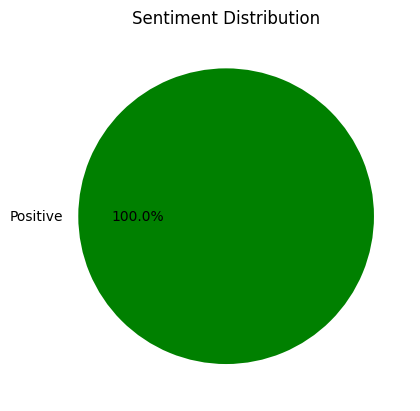

In [43]:
# Analyze sentiments using TextBlob
sentiments = [TextBlob(review).sentiment.polarity for review in cleaned_reviews]
sentiment_categories = ['Positive' if sentiment > 0 else 'Negative' if sentiment < 0 else 'Neutral'
                        for sentiment in sentiments]

# Create DataFrame for analysis
sentiment_df = pd.DataFrame({
    "Review": cleaned_reviews,
    "Polarity": sentiments,
    "Sentiment": sentiment_categories
})

# Display sentiment breakdown
sentiment_counts = sentiment_df['Sentiment'].value_counts()
print(sentiment_counts)

# Visualize sentiment distribution
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()


Step 7:
- Generating Wordcloud

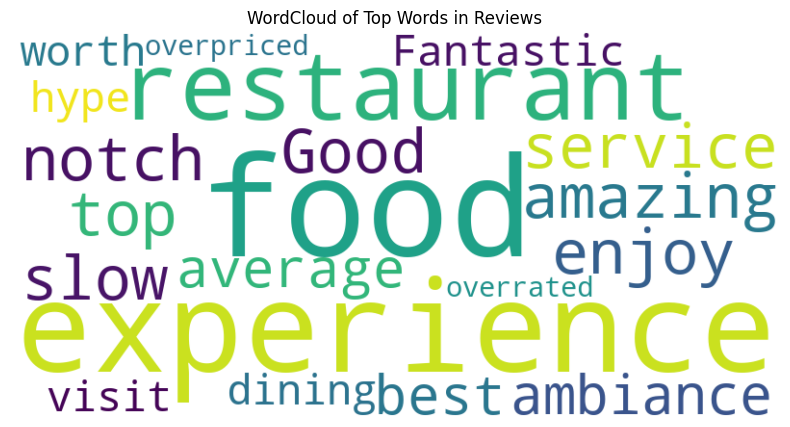

In [44]:
all_text = ' '.join(cleaned_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Top Words in Reviews")
plt.show()
